In [1]:
import sympy as sp
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
theta, x = sp.symbols('theta x', positive=True)

# Step 1: Prior PDF
prior = 2*(1 - theta)   # valid for 0 < theta < 1




# Step 2: Conditional PDF
conditional = theta * sp.exp(-theta * x)   # x > 0


# Step 3: Joint PDF
f_joint = conditional * prior
f_joint_simplified = sp.simplify(f_joint)

# Step 4: Marginal PDF f_X(x)
f_marginal_x = sp.integrate(f_joint_simplified, (theta, 0, 1))
f_marginal_x_simplified = sp.simplify(f_marginal_x)

# Step 5: Posterior PDF f_{Theta|X}(theta|x)
f_posterior = f_joint_simplified / f_marginal_x_simplified
f_posterior_simplified = sp.simplify(f_posterior)

# Display results
print("1. Prior PDF f_Θ(θ):")
display(Math(sp.latex(prior)))

print("2. Conditional PDF f_{X|Θ}(x|θ):")
display(Math(sp.latex(conditional)))

print("3. Joint PDF f_{X,Θ}(x,θ):")
display(Math(sp.latex(f_joint_simplified)))

print("4. Marginal PDF f_X(x):")
display(Math(sp.latex(f_marginal_x_simplified)))

print("5. Posterior PDF f_{Θ|X}(θ|x):")
display(Math(sp.latex(f_posterior_simplified)))


1. Prior PDF f_Θ(θ):


<IPython.core.display.Math object>

2. Conditional PDF f_{X|Θ}(x|θ):


<IPython.core.display.Math object>

3. Joint PDF f_{X,Θ}(x,θ):


<IPython.core.display.Math object>

4. Marginal PDF f_X(x):


<IPython.core.display.Math object>

5. Posterior PDF f_{Θ|X}(θ|x):


<IPython.core.display.Math object>

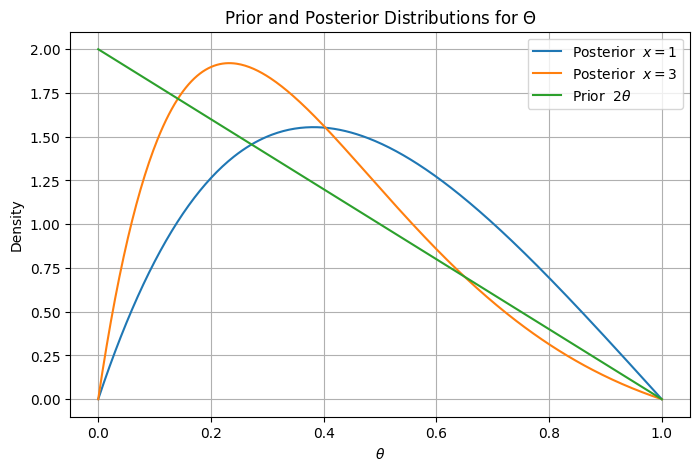

In [2]:
# Convert symbolic → numerical functions

prior_fn = sp.lambdify(theta, prior, "numpy")
posterior_x1_fn = sp.lambdify(theta, f_posterior.subs(x, 1), "numpy")
posterior_x3_fn = sp.lambdify(theta, f_posterior.subs(x, 3), "numpy")

# Theta range
theta_vals = np.linspace(0, 1, 400)

# Plotting
plt.figure(figsize=(8,5))


plt.plot(theta_vals, posterior_x1_fn(theta_vals), label="Posterior  $x=1$")
plt.plot(theta_vals, posterior_x3_fn(theta_vals), label="Posterior  $x=3$")
plt.plot(theta_vals, prior_fn(theta_vals), label="Prior  $2\\theta$")

plt.title("Prior and Posterior Distributions for $\\Theta$")
plt.xlabel("$\\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.show()

In [4]:
# Define new symbols for two observations
x1, x2 = sp.symbols('x1 x2', positive=True)


# Step 1: Joint conditional PDF for X1, X2 given Theta (i.i.d.)
conditional_x1 = conditional.subs(x, x1)
conditional_x2 = conditional.subs(x, x2)
joint_conditional_2 = conditional_x1 * conditional_x2



# Step 2: Joint PDF with prior
f_joint_2 = joint_conditional_2 * prior
f_joint_2_simplified = sp.simplify(f_joint_2)

# Step 3: Marginal PDF f_{X1,X2}(x1,x2)
f_marginal_2 = sp.integrate(f_joint_2_simplified, (theta, 0, 1))
f_marginal_2_simplified = sp.simplify(f_marginal_2)

# Step 4: Posterior PDF f_{Theta|X1,X2}(theta|x1,x2)
f_posterior_2 = f_joint_2_simplified / f_marginal_2_simplified
f_posterior_2_simplified = sp.simplify(f_posterior_2)

# Display results
print("1. Joint conditional PDF f_{X1,X2|Θ}(x1,x2|θ):")
display(Math(sp.latex(joint_conditional_2)))

print("2. Joint PDF f_{X1,X2,Θ}(x1,x2,θ):")
display(Math(sp.latex(f_joint_2_simplified)))

print("3. Marginal PDF f_{X1,X2}(x1,x2):")
display(Math(sp.latex(f_marginal_2_simplified)))

print("4. Posterior PDF f_{Θ|X1,X2}(θ|x1,x2):")
display(Math(sp.latex(f_posterior_2_simplified)))


1. Joint conditional PDF f_{X1,X2|Θ}(x1,x2|θ):


<IPython.core.display.Math object>

2. Joint PDF f_{X1,X2,Θ}(x1,x2,θ):


<IPython.core.display.Math object>

3. Marginal PDF f_{X1,X2}(x1,x2):


<IPython.core.display.Math object>

4. Posterior PDF f_{Θ|X1,X2}(θ|x1,x2):


<IPython.core.display.Math object>

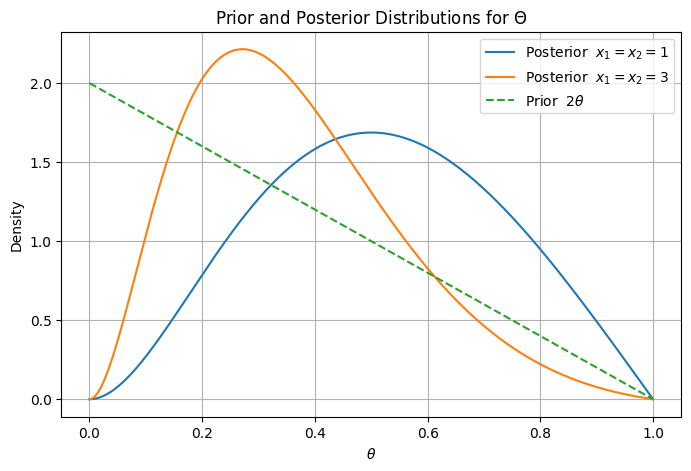

In [5]:
# Convert symbolic → numerical functions

# Prior function
prior_fn = sp.lambdify(theta, prior, "numpy")

# Posterior functions for two observations
# Example: measured x1=x2=1, and x1=x2=3
posterior_1_1_fn = sp.lambdify(theta, f_posterior_2.subs({x1: 1, x2: 1}), "numpy")
posterior_3_3_fn = sp.lambdify(theta, f_posterior_2.subs({x1: 3, x2: 3}), "numpy")

# Theta range
theta_vals = np.linspace(0, 1, 400)

# Plotting
plt.figure(figsize=(8,5))

plt.plot(theta_vals, posterior_1_1_fn(theta_vals), label="Posterior  $x_1=x_2=1$")
plt.plot(theta_vals, posterior_3_3_fn(theta_vals), label="Posterior  $x_1=x_2=3$")
plt.plot(theta_vals, prior_fn(theta_vals), label="Prior  $2\\theta$", linestyle='--')

plt.title("Prior and Posterior Distributions for $\\Theta$")
plt.xlabel("$\\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# --- Generalization to n observations ---
n = 3  # change n to any number of observations
x_symbols = sp.symbols(f'x1:{n+1}', positive=True)  # creates x1, x2, ..., xn

# Step 1: Joint conditional PDF for n i.i.d. observations
joint_conditional_n = sp.prod(conditional.subs(x, xi) for xi in x_symbols)

# Step 2: Joint PDF with prior
f_joint_n = joint_conditional_n * prior
f_joint_n_simplified = sp.simplify(f_joint_n)

# Step 3: Marginal PDF f_{X1,...,Xn}(x1,...,xn)
f_marginal_n = sp.integrate(f_joint_n_simplified, (theta, 0, 1))
f_marginal_n_simplified = sp.simplify(f_marginal_n)

# Step 4: Posterior PDF f_{Theta|X1,...,Xn}(theta|x1,...,xn)
f_posterior_n = f_joint_n_simplified / f_marginal_n_simplified
f_posterior_n_simplified = sp.simplify(f_posterior_n)


# Display results
print(f"Joint conditional PDF for {n} observations f_{{X1,...,Xn|Θ}}:")
display(Math(sp.latex(joint_conditional_n)))

print(f"Joint PDF f_{{X1,...,Xn,Θ}}:")
display(Math(sp.latex(f_joint_n_simplified)))

print(f"Marginal PDF f_{{X1,...,Xn}}:")
display(Math(sp.latex(f_marginal_n_simplified)))

print(f"Posterior PDF f_{{Θ|X1,...,Xn}}:")
display(Math(sp.latex(f_posterior_n_simplified)))


Joint conditional PDF for 3 observations f_{X1,...,Xn|Θ}:


<IPython.core.display.Math object>

Joint PDF f_{X1,...,Xn,Θ}:


<IPython.core.display.Math object>

Marginal PDF f_{X1,...,Xn}:


<IPython.core.display.Math object>

Posterior PDF f_{Θ|X1,...,Xn}:


<IPython.core.display.Math object>

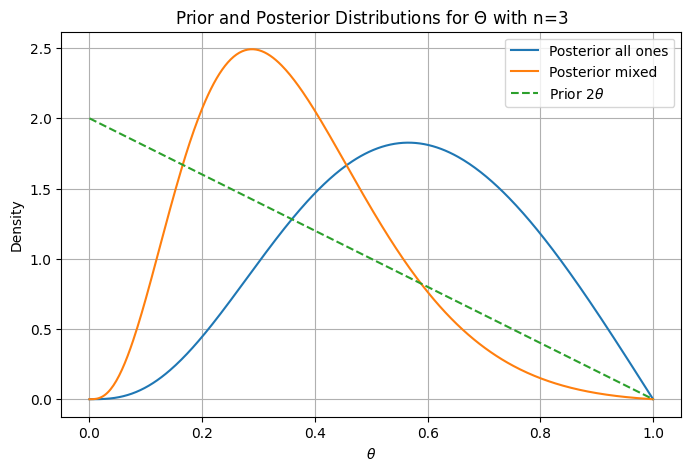

In [7]:
# --- Generalized plotting for n observations ---

import numpy as np
import matplotlib.pyplot as plt

# Prior function
prior_fn = sp.lambdify(theta, prior, "numpy")

# Example sets of observed values for n observations


obs_sets = [
    [1]*n,  # all observations = 1
    list(np.random.choice([1, 2, 3], size=n))  # n observations randomly chosen from 1,2,3
]

# Theta range
theta_vals = np.linspace(0, 1, 400)

plt.figure(figsize=(8,5))

for obs_values in obs_sets:
    # Substitute numerical values into the posterior
    posterior_num = f_posterior_n_simplified
    posterior_num = posterior_num.subs({xi: val for xi, val in zip(x_symbols, obs_values)})

    # Convert to numerical function
    posterior_fn = sp.lambdify(theta, posterior_num, "numpy")

    if all(val == 1 for val in obs_values):
        label = f"Posterior all ones"
    else:
        label = "Posterior mixed"

    # Plot
    plt.plot(theta_vals, posterior_fn(theta_vals), label=label)



# Plot prior
plt.plot(theta_vals, prior_fn(theta_vals), label="Prior $2\\theta$", linestyle='--')

plt.title(f"Prior and Posterior Distributions for $\\Theta$ with n={n}")
plt.xlabel("$\\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-247147175.py:30: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.



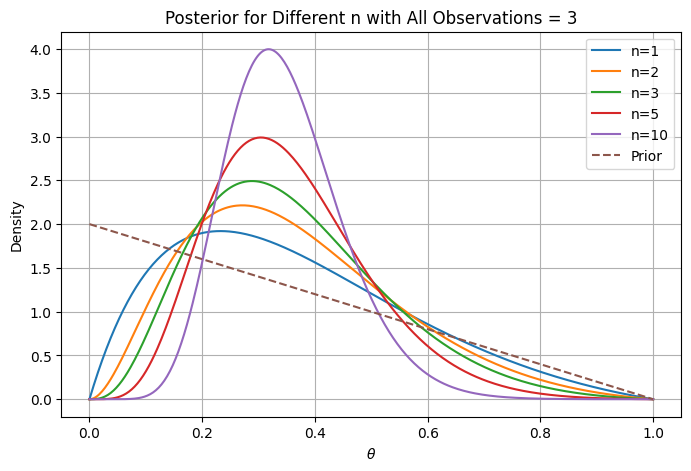

In [8]:

# Symbols
theta = sp.symbols('theta', positive=True)

# Your conditional and prior
# conditional = ...
# prior = ...

fixed_x_value = 3
n_values = [1, 2, 3, 5, 10]

theta_vals = np.linspace(0, 1, 400)

# Precompute conditional at x=3
single_val = conditional.subs(x, fixed_x_value)

plt.figure(figsize=(8,5))

for n in n_values:

    # Joint conditional (fast!)
    joint_conditional_n = single_val**n

    # Posterior numerator
    posterior_num = joint_conditional_n * prior

    # Lambdify once
    posterior_num_fn = sp.lambdify(theta, posterior_num, "numpy")

    # Numerical marginal integral (fast)
    marginal_val = np.trapz(posterior_num_fn(theta_vals), theta_vals)

    # Normalized posterior
    posterior_fn = lambda t: posterior_num_fn(t) / marginal_val

    # Plot
    plt.plot(theta_vals, posterior_fn(theta_vals), label=f"n={n}")

# Plot prior
prior_fn = sp.lambdify(theta, prior, "numpy")
plt.plot(theta_vals, prior_fn(theta_vals), linestyle="--", label="Prior")

plt.xlabel(r'$\theta$')
plt.ylabel("Density")
plt.title("Posterior for Different n with All Observations = 3")
plt.legend()
plt.grid(True)
plt.show()
